Height: 42
Width: 184


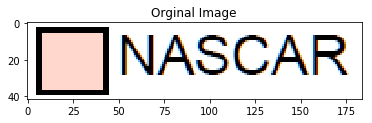

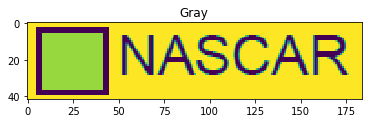

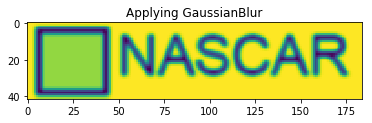

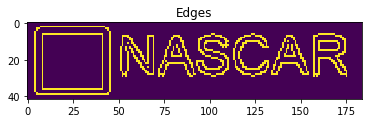

In [108]:
# Import necessary libraries
from matplotlib import pyplot as plt
import cv2

# Read image
image = cv2.imread('data_2/4.png')
# height and width of an image
height, width = image.shape[:2]
print("Height:",height)
print("Width:",width)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image)
plt.title('Orginal Image')
plt.show()


plt.imshow(gray)
plt.title('Gray')
plt.show()

gray = cv2.GaussianBlur(gray, (5,5), 0)
plt.imshow(gray)
plt.title('Applying GaussianBlur')
plt.show()

# Finding Edges
edges = cv2.Canny(gray, 60, 255)
plt.imshow(edges)
plt.title('Edges')
plt.show()

# contours -> an outline representing or bounding the shape.
_,cnts, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(cnts, key=cv2.contourArea, reverse=True)[:10]

#print(image.shape)


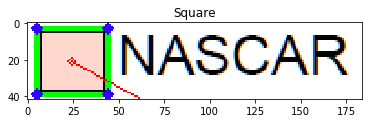

In [86]:
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 100000 and area < 1000:
        contours.remove(contour)
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.01*perimeter, True)
    if len(approx) == 4:
       
        
        cv2.circle(image, (720, 360), 5, (255,0,0), 5)
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)
        M = cv2.moments(approx)
        centers = []
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            cX, cY = 0, 0

        P1 = approx[0]
        P1x = P1[0][0]
        P1y = P1[0][1]

        P2 = approx[1]
        P2x = P2[0][0]
        P2y = P2[0][1]

        P3 = approx[2]
        P3x = P3[0][0]
        P3y = P3[0][1]

        P4 = approx[3]
        P4x = P4[0][0]
        P4y = P4[0][1]
        

        cv2.circle(image, (P1x, P1y), 1, (50,0,255), 4)       # left top corner
        cv2.circle(image, (P2x, P2y), 1, (50,0,255), 4)       # bottom left
        cv2.circle(image, (P3x, P3y), 1, (50,0,255), 4)       # bottom right
        cv2.circle(image, (P4x, P4y), 1, (50,0,255), 4)       # top right

        centers.append([cX, cY])

        cv2.circle(image, (cX, cY), 2, (255,0,0), 1)
        cv2.line(image, (cX, cY), (int(1280/2), int(720/2)), (255,0,0))
        #cv2.imshow("Image window", image)
        #cv2.waitKey(0)
        plt.imshow(image)
        plt.title('Square')
        plt.show()


# cv2.imshow("Image window", image)
# cv2.waitKey(0)


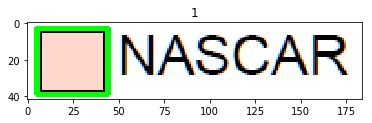

In [115]:
# Import necessary libraries
from matplotlib import pyplot as plt
import cv2

# Read image
image = cv2.imread('data_2/4.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)





gray = cv2.GaussianBlur(gray, (5,5), 0)


# Finding Edges
edges = cv2.Canny(gray, 60, 255)


# contours -> an outline representing or bounding the shape.
_,cnts, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(cnts, key=cv2.contourArea, reverse=True)[:10]

for contour in contours:
    area = cv2.contourArea(contour)
    if area > 100000 and area < 1000:
        contours.remove(contour)
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.01*perimeter, True)
    if len(approx) == 4:
       
        
        cv2.circle(image, (720, 360), 5, (255,0,0), 5)
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)
        plt.imshow(image)
        plt.title('1')
        plt.show()
        
        M = cv2.moments(approx)
        
        centers = []
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            cX, cY = 0, 0

        P1 = approx[0]
        P1x = P1[0][0]
        P1y = P1[0][1]

        P2 = approx[1]
        P2x = P2[0][0]
        P2y = P2[0][1]

        P3 = approx[2]
        P3x = P3[0][0]
        P3y = P3[0][1]

        P4 = approx[3]
        P4x = P4[0][0]
        P4y = P4[0][1]
        
        

#         cv2.circle(image, (P1x, P1y), 1, (50,0,255), 4)       # left top corner
#         cv2.circle(image, (P2x, P2y), 1, (50,0,255), 4)       # bottom left
#         cv2.circle(image, (P3x, P3y), 1, (50,0,255), 4)       # bottom right
#         cv2.circle(image, (P4x, P4y), 1, (50,0,255), 4)       # top right

#         centers.append([cX, cY])

#         cv2.circle(image, (cX, cY), 2, (255,0,0), 1)
#         cv2.line(image, (cX, cY), (int(1280/2), int(720/2)), (255,0,0))
#         #cv2.imshow("Image window", image)
#         #cv2.waitKey(0)
        







Height: 42
Width: 184


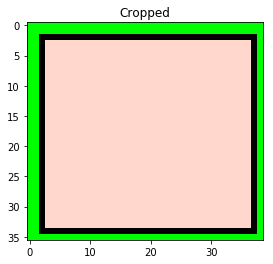

True

In [116]:
import cv2
height, width = image.shape[:2]
print("Height:",height)
print("Width:",width)
#image = cv2.imread("data/basic-original.png")
#crop_img = img[y:y+h, x:x+w] 


# crop the image using array slices -- it's a NumPy array
cropped = image[P1y:P3y, P2x:P3x]

# first supply the startY and endY coordinates, 
# followed by the startX and endX coordinates to the slice." so [Y1:Y2, X1:X2] 

# cv2.imshow("cropped", cropped)
# cv2.waitKey(0)
plt.imshow(cropped)
plt.title('Cropped')
plt.show()
cv2.imwrite('data/7.png',cropped)




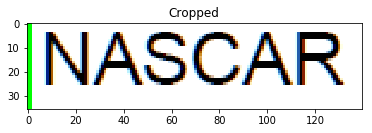

In [124]:
cropped_2 = image[P1y:P3y,P3x:width]
plt.imshow(cropped_2)
plt.title('Cropped')
plt.show()

In [96]:
print("P1y: ",P1y)
print("P3y: ",P3y)
print("P2x: ",P2x)
print("P3x: ",P3x)

P1y:  3
P3y:  39
P2x:  5
P3x:  44


In [100]:
from PIL import Image

im = Image.open('data_2/4.png')
width, height = im.size
print(width)
print(height)

184
42
